<a href="https://colab.research.google.com/github/villagraciaa/portfolio-theory-and-asset-pricing/blob/test1/Submission_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

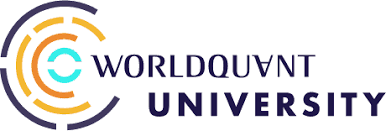
## **Course:** MScFE (20/08) Portfolio Theory and Asset Pricing (C19-S4)
---
Group 6-A Submission #1

**Group Members** (in alphabetical order)
1.  Al Rey Villagracia (arcvillagracia@gmail.com)
2.  Long Nguyen (nguyenlongphi1507@gmail.com)
3.  Mateusz Dubaniowski (iwo@utexas.edu)
1.  Shiqi Zhang (zhangshiqi1@gmail.com)
2.  Yachao Wang (ethan.wang.yc@gmail.com)










---
A. Calculate the expected return in the upcoming year. Use the Capital Asset Pricing Model and the given parameters

In [12]:
#Import libraries needed
import pandas as pd
import numpy as np 
import scipy.stats as stats

#Assign Given parameters
b1=1.07  #XLE beta
b2=1.06  #XLI beta
Rf=0.0225 #risk free rate
Rm=0.09   #Market return
sigma=0.15 #Market standard deviation 

In [4]:
beta=np.array([b1,b2])
ERi = Rf + beta*(Rm-Rf)
print("Expected Return of XLE: ",ERi[0]*100,"%")
print("Expected Return of XLI: ",ERi[1]*100,"%")

Expected Return of XLE:  9.4725 %
Expected Return of XLI:  9.405 %


Calculate the daily and annualized standard deviation of returns for the prior year. Use the
MS Excel spreadsheet provided titled “GWP_PTAP_Data.xlsx”. When annualizing daily
standard deviation, assume there are 252 trading days in a year.

In [6]:
#Load data
url="https://raw.githubusercontent.com/villagraciaa/portfolio-theory-and-asset-pricing/master/XLEXLI.csv"
raw= pd.read_csv(url, parse_dates=True, index_col=0)

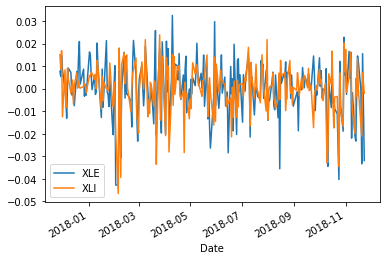

In [17]:
#Calculating daily returns from data
daily_returns=pd.DataFrame(data=None,columns=["XLE","XLI"])
daily_returns=np.log(raw.div(raw.shift()))
daily_returns=daily_returns.dropna()
daily_returns.plot()

In [ ]:
#Calculating standard deviation
print("Daily Returns Standard Deviation in Percent")
print(100*daily_returns.std())
#
print("")
print("Annualized Standard Deviation in Percent")
print(np.sqrt(252)*daily_returns.std()*100)


Daily Returns Standard Deviation in Percent
XLE    1.280011
XLI    1.078390
dtype: float64

Annualized Standard Deviation in Percent
XLE    20.319540
XLI    17.118915
dtype: float64


B. Calculate the correlation (to two (2) decimal places) between each sector’s return.

In [16]:
correlation = stats.pearsonr(daily_returns["XLE"],daily_returns["XLI"])
print("Data Correlation:",round(correlation[0],2))

Data Correlation: 0.66


In [46]:
def assetPriceReg(df_stk):
    import statsmodels.formula.api as sm # module for stats models
    from statsmodels.iolib.summary2 import summary_col # module for presenting stats models outputs nicely
    import pandas_datareader.data as web  # module for reading datasets directly from the web
    
    # Reading in factor data
    df_factors = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench')[0]
    df_factors.rename(columns={'Mkt-RF': 'MKT'}, inplace=True)
    df_factors['MKT'] = df_factors['MKT']/100
    df_factors['SMB'] = df_factors['SMB']/100
    df_factors['HML'] = df_factors['HML']/100
    df_factors['RMW'] = df_factors['RMW']/100
    df_factors['CMA'] = df_factors['CMA']/100
    
    df_stock_factor = pd.merge(df_stk,df_factors,left_index=True,right_index=True) # Merging the stock and factor returns dataframes together
    df_stock_factor['XsRet'] = df_stock_factor['Returns'] - df_stock_factor['RF'] # Calculating excess returns

    # Running CAPM, FF3, and FF5 models.
    CAPM = sm.ols(formula = 'XsRet ~ MKT', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    FF3 = sm.ols( formula = 'XsRet ~ MKT + SMB + HML', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    FF5 = sm.ols( formula = 'XsRet ~ MKT + SMB + HML + RMW + CMA', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})

    CAPMtstat = CAPM.tvalues
    FF3tstat = FF3.tvalues
    FF5tstat = FF5.tvalues

    CAPMcoeff = CAPM.params
    FF3coeff = FF3.params
    FF5coeff = FF5.params

    # DataFrame with coefficients and t-stats
    results_df = pd.DataFrame({'CAPMcoeff':CAPMcoeff,'CAPMtstat':CAPMtstat,
                               'FF3coeff':FF3coeff, 'FF3tstat':FF3tstat,
                               'FF5coeff':FF5coeff, 'FF5tstat':FF5tstat},
    index = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])


    dfoutput = summary_col([CAPM,FF3, FF5],stars=True,float_format='%0.4f',
                  model_names=['CAPM','FF3','FF5'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'Adjusted R2':lambda x: "{:.4f}".format(x.rsquared_adj)}, 
                             regressor_order = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])

    print(dfoutput)
    
    return results_df

In [47]:
data1 = daily_returns.filter(regex='XLE').rename(columns={"XLE": "Returns"}, errors="raise")
data2 = daily_returns.filter(regex='XLI').rename(columns={"XLI": "Returns"}, errors="raise")
df_regOutput = assetPriceReg(data1)


               CAPM       FF3        FF5    
--------------------------------------------
Intercept   -0.0068*** -0.0067*** -0.0071***
            (0.0006)   (0.0005)   (0.0004)  
MKT         0.9524***  1.0535***  1.0263*** 
            (0.0607)   (0.0641)   (0.0603)  
SMB                    0.1937*    0.0285    
                       (0.1126)   (0.0952)  
HML                    0.5648***  -0.0860   
                       (0.0987)   (0.1185)  
RMW                               -1.2827***
                                  (0.1276)  
CMA                               1.4626*** 
                                  (0.1721)  
N           250        250        250       
Adjusted R2 0.4763     0.5267     0.7241    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
